# Trabajo computacional 1. Ejercicio 2

Considere la red social de 62 delfines de Nueva Zelanda (*dolphins.txt*):

In [28]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

G=nx.read_gml("data/dolphins.gml")
genero=ldata("data/dolphinsGender.txt")

**a.** Examine diferentes opciones de layout para este grafo e identifique la que le resulte más informativa. Justifique su elección detallando las características estructurales de la red que su elección pone en evidencia. Incluya en la representación gráfica de la red información sobre el sexo de los delfines.

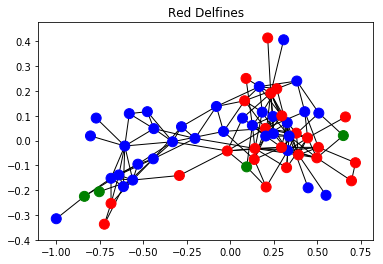

In [3]:

f=[]                     ##f es la lista de nodos tal cual los ordena el nx. Es una especie de orden alfabético
for n in nx.nodes(G):
    f.append(n)

F=[]                    ##F va a ser el nuevo vector de nodo-genero pero ordenando los nodos de la misma manera que lo hace nx
for n in f:
   for k,g in genero:
        if k==n:
            F.append([k,g])
# a=0                        ##Todo esto cuenta cuántos nodos de f coinciden con los nodos de F. Es decir, se fija si están en el mismo orden las dos listas de nodos
# k=0
# for n in f:
#    k+=1
#    if n==F[k-1][0]:
#         a+=1
# a
SG=dict(F)              ##Se le da atributos a los nodos.
nx.set_node_attributes(G, SG,"genero")
# nx.get_node_attributes(G,"genero")
#G.node[f[8]]['genero']  Para pedirle el atributo genero de un nodo tengo que poner primero el nodo (el nombre con string o su posicion en la lista de nodos) y dsps el atributo que quiero 
options={'with_labels':False,
        'node_color':["r" if g=="f" else "b" if g=="m" else "g" for n,g in F],
        'font_weight':'bold',
        'node_size':100}
plt.title("Red Delfines")

nx.draw_networkx(G,**options)
plt.show()

En el gráfico se muestra el grafo con el género de cada nodo: en azul machos, en rojo las hembras y en verde los especímenes no identificados. 

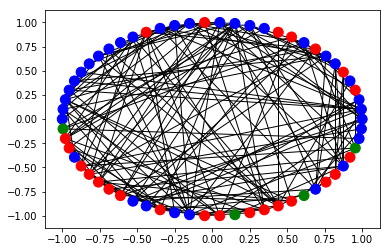

In [4]:
#Esto lo puse porque el enunciado pedia varias formas de layouts, pero es eliminable
#posi = nx.circular_layout(G)
posi = nx.shell_layout(G, nlist=None, scale=1, center=None, dim=2)
#nx.circular_layout(G, scale=1, center=None, dim=2)
nx.draw_networkx(G,**options, pos=posi)     #Esto lo puse porque pedia varias formas de grafos, es eliminable
plt.show()

A continuación se presenta el conteo de cada género reportado:24 hembras, 34 machos y 4 no especificados. 

In [5]:
f=0                 ##Cuenta cuántos masculinos, NA y femeninos hay. 
m=0
NA=0
for n,g in genero:
   if g=="f":
    f+=1
   else:
    if g=="m":
        m+=1
    else:
        NA+=1
print(f,m,NA)


24 34 4


**b.** ¿Se trata una red donde prevalece la homofilia en la variable género?
  

 *i.* Considere la distribución nula para la fracción de enlaces que vinculan géneros diferentes, generada a partir de al menos 1000 asignaciones aleatorias de género.


En primer lugar se calculó en la red real el número de enlaces entre los distintos tipos de nodos de acuerdo a su género: macho-macho (MM), hembra-hembra (FF), macho-no asignado (NAM), hembra-no asignado (NAF) Y no asignado-no asignado (NANA). La cantidad de enlaces macho-hembra (MF) se obtuvo restando al número total de enlaces, los enlaces anteriormente señalados. Diviendo por el número total de enlaces se obtuvo la probabilidad frecuentista de enlaces de cada tipo. Las probabilidades están en el orden en que fueron mencionados los enlaces anteriormente.
Se observa que la suma de las probabilidades es, efectivamente, 1.

In [6]:
Enlaces_P=[]     #Lista de enlaces que también incluye los generos de los nodos del enlace              
GENERO=nx.get_node_attributes(G,"genero") #me devuelve un diccionario con los nodos y su genero
for n in G.edges:
    Enlaces_P.append([n[0],GENERO[n[0]],n[1],GENERO[n[1]]])
EnlacesMM_P=[] #Lista de enlaces macho-macho
for n,m,o,p in Enlaces_P:
    if m=="m" and p=="m":
        EnlacesMM_P.append([n,o])
EnlacesFF_P=[] #Lista de enlaces hembra-hembra
for n,m,o,p in Enlaces_P:
    if m=="f" and p=="f":
        EnlacesFF_P.append([n,o])
EnlacesNAM_P=[] #Lista de enlaces no asignado-macho
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="m":
            EnlacesNAM_P.append([n,o])        
    if  m=="m" and p=="NA":
            EnlacesNAM_P.append([n,o])
EnlacesNAF_P=[] #Lista de enlaces no asignado-hembra
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="f":
        EnlacesNAF_P.append([n,o]) 
    if m=="f" and p=="NA":
        EnlacesNAF_P.append([n,o])
EnlacesNANA_P=[] #Lista de enlaces no asignado-no asignado
for n,m,o,p in Enlaces_P:
    if m=="NA" and p=="NA":
        EnlacesNANA_P.append([n,o])  
        
Probabilidad_de_enlaces_P=(len(EnlacesMM_P)/len(Enlaces_P),
                           len(EnlacesFF_P)/len(Enlaces_P),
                           len(EnlacesNAM_P)/len(Enlaces_P),
                           len(EnlacesNAF_P)/len(Enlaces_P),
                           len(EnlacesNANA_P)/len(Enlaces_P),
                           (len(Enlaces_P)-len(EnlacesFF_P)-len(EnlacesMM_P)-len(EnlacesNAM_P)-len(EnlacesNAF_P)-len(EnlacesNANA_P))/len(Enlaces_P),(len(EnlacesMM_P)+len(EnlacesFF_P))/len(Enlaces_P))
prob=("MM","FF","NAM","NAF","NANA","MF","MM+FF")
print(prob)
print(Probabilidad_de_enlaces_P)
sum(Probabilidad_de_enlaces_P) #Van a sumar 1 si le resto el sexto elemento de Probabilidades_de_enlaces , es decir, MM+FF 


('MM', 'FF', 'NAM', 'NAF', 'NANA', 'MF', 'MM+FF')
(0.37735849056603776, 0.22641509433962265, 0.0440251572327044, 0.025157232704402517, 0.0, 0.3270440251572327, 0.6037735849056604)


1.6037735849056602

In [7]:
Enlaces_mismo_gen=((len(EnlacesMM_P)+ len(EnlacesFF_P))/len(Enlaces_P)) 
print(Enlaces_mismo_gen)

0.6037735849056604


Distribución nula: ahora se generaron redes con asignaciones de género al azar para sus nodos. Para el modelo nulo se decidió mantener el número de nodos de cada género, para poder identificar cuán probables son los enlaces entre delfines del mismo y distinto género que se obtienen del grafo original. Para esto, se trabajó con la lista de nodo-género original, separando la columna de géneros y reasignándolos al azar con la funcion *np.random.shuffle*. Con esto se genera una nueva lista que se usará para darle atributos al grafo. Se calculó la probabilidad de enlaces entre distintos géneros de la misma forma que con la red original.

In [8]:
def Genero_al_azar(Gen): #Gen es la lista de nodos - genero a utilizar 
    
    N=[] #lista con nodos
    J=[] # lista con generos
    for n,g in Gen: #n es el nodo, g el genero
        N.append(n)
        J.append(g)
    np.random.shuffle(J) #ordeno de forma random la lista de generos 
    
    F_Gen=[] #lista nodos-genero pero con los generos ordenados al azar 
    for n in range(len(N)):
        F_Gen.append([N[n],J[n]])
    SG_0=dict(F_Gen)                              
    nx.set_node_attributes(G, SG_0,"genero") 
    
    Enlaces=[]    #Lista (para la red con generos aleatorios) de enlaces que también incluye los generos de los nodos del enlace                  
    GENERO=nx.get_node_attributes(G,"genero")
    for n in G.edges:
        Enlaces.append([n[0],GENERO[n[0]],n[1],GENERO[n[1]]])
    EnlacesMM=[]
    for n,m,o,p in Enlaces:
        if m=="m" and p=="m":
            EnlacesMM.append([n,o])
    EnlacesFF=[]
    for n,m,o,p in Enlaces:
        if m=="f" and p=="f":
            EnlacesFF.append([n,o])
    EnlacesNAM=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="m":
            EnlacesNAM.append([n,o]) 
        if  m=="m" and p=="NA":
            EnlacesNAM.append([n,o])

    EnlacesNAF=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="f":
            EnlacesNAF.append([n,o]) 
        if m=="f" and p=="NA":
            EnlacesNAF.append([n,o])
    EnlacesNANA=[]
    for n,m,o,p in Enlaces:
        if m=="NA" and p=="NA":
            EnlacesNANA.append([n,o])  

    Probabilidad_de_enlaces=(len(EnlacesMM)/len(Enlaces),
                             len(EnlacesFF)/len(Enlaces),
                             len(EnlacesNAM)/len(Enlaces),
                             len(EnlacesNAF)/len(Enlaces),
                             len(EnlacesNANA)/len(Enlaces),
                             (len(Enlaces)-len(EnlacesFF)-len(EnlacesMM)-len(EnlacesNAM)-len(EnlacesNAF)-len(EnlacesNANA))/len(Enlaces), (len(EnlacesMM)+len(EnlacesFF))/len(Enlaces))
    return(Probabilidad_de_enlaces) ##Lista con las probabilidades de sacar un enlace MM,FF, NAM, NAF, NANA, MF Y MM+FF para cada distribución de géneros aleatoria


Se corrió esto 10000 veces y se guardaran en distintas listas las probabilidades de los enlaces MM, FF y MF para cada distribución aleatoria de género. Luego se realizaron histogramas de estas distribuciones y se comparó con el valor de la red real.

In [9]:
Dis_prob_enlaMM=[] ##Vector que va a alojar las prob MM de cada distribución aleatoria de género
Dis_prob_enlaFF=[] ##Vector que va a alojar las prob FF de cada distribución aleatoria de género
Dis_prob_enlaMF=[]##Vector que va a alojar las prob MF de cada distribución aleatoria de género
Dis_prob_enlaMMFF=[] ##Vector que va a alojar las prob MM+FF de cada distribución aleatoria de género
Q=20000
for q in range(0,Q): ##Corro q veces la función Genero_al_azar para armar la distribución de probabilidades
    Dis_prob_enlaMM.append(Genero_al_azar(F)[0])
    Dis_prob_enlaFF.append(Genero_al_azar(F)[1])
    Dis_prob_enlaMF.append(Genero_al_azar(F)[5])
    Dis_prob_enlaMMFF.append(Genero_al_azar(F)[6])


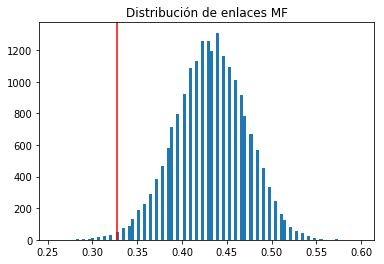

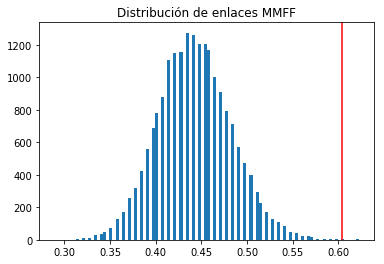

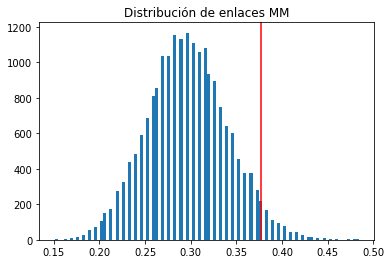

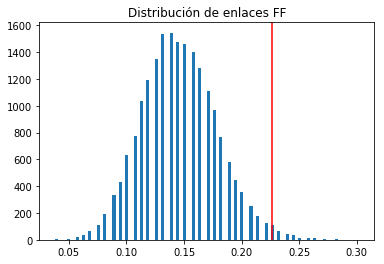

In [10]:
bineo=100
plt.hist(Dis_prob_enlaMF,bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[5],c="red")
plt.title("Distribución de enlaces MF")
plt.show()

plt.hist(Dis_prob_enlaMMFF,bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[6],c="red")
plt.title("Distribución de enlaces MMFF")
plt.show()

plt.hist(Dis_prob_enlaMM,bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[0],c="red")
plt.title("Distribución de enlaces MM")
plt.show()

plt.hist(Dis_prob_enlaFF, bins=bineo)
plt.axvline(Probabilidad_de_enlaces_P[1],c="red")
plt.title("Distribución de enlaces FF")
plt.show()

Se observa que la probabilidad de enlace MM y FF Y MM+FF están por debajo de la media de las distribuciones aleatorias en género. Una manera de cuantificarlo es dando el *p-value* para cada caso.

iii. Estime la significancia estadística (p-valor) del valor observado en el caso de la red real.

In [12]:
# Dis_prob_enlaMMFF=[]
# for j in range(len(Dis_prob_enlaMM)):
#     Dis_prob_enlaMMFF.append(Dis_prob_enlaMM[j]+Dis_prob_enlaFF[j])
    
# p=len(EnlacesMM_P)/len(Enlaces_P)+len(EnlacesFF_P)/len(Enlaces_P)
                           

In [11]:
##Veamos cuántos eventos son más extremos que los obtenidos para nuestra red en particular

histMF=np.histogram(Dis_prob_enlaMF,bins=bineo)
histMM=np.histogram(Dis_prob_enlaMM,bins=bineo)
histFF=np.histogram(Dis_prob_enlaFF,bins=bineo)
histMMFF=np.histogram(Dis_prob_enlaMMFF,bins=bineo)
pMF=Probabilidad_de_enlaces_P[5]
pMM=Probabilidad_de_enlaces_P[0]
pFF=Probabilidad_de_enlaces_P[1]
pMMFF=Probabilidad_de_enlaces_P[6]
NMF=[]
NMM=[]
NFF=[]
NMMFF=[]
for i in range(len(histMF[0])):
    if histMF[1][i]<pMF:
        NMF.append(histMF[0][i])
for i in range(len(histMM[0])):
    if histMM[1][i]>pMM:
        NMM.append(histMM[0][i])
for i in range(len(histFF[0])):
    if histFF[1][i]>pFF:
        NFF.append(histFF[0][i])
for i in range(len(histMMFF[0])):
    if histMMFF[1][i]>pMMFF:
        NMMFF.append(histFF[0][i])        

Que_tan_anomala_es_la_red=[sum(NMF)/Q,sum(NMM)/Q,sum(NFF)/Q, sum(NMMFF)/Q]  
print(Que_tan_anomala_es_la_red)


[0.0072, 0.03185, 0.01, 0.00015]


**c.** Identifique alguna metodología basada en observables topológicos para eliminar nodos secuencialmente de la red de manera de dividirla en dos componentes de tamaños comparables en el menor número de pasos. Explique y muestre los resultados obtenidos.
Intente cuantificar su estrategia comparándola con lo que se obtendría al eliminar nodos de manera aleatoria.

El criterio que se decidió usar fue quitar nodos según su grado. A continuación se muestra el grafo con la distribución en sexos y el tamaño del nodo dependiente del grado del mismo.

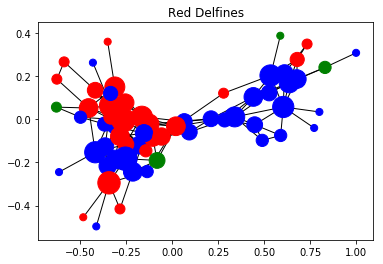

In [12]:
Nodos_genero_grado=[]
for n,g in F: ##F era el vector de nodo-genero pero ordenando los nodos de la misma manera que lo hace nx
    nx.get_node_attributes(G,"grado")
    grado=G.degree(n)
    Nodos_genero_grado.append([n,g,grado])
Nodos_grado=[]
for n,g in F:
    grado=G.degree(n)
    Nodos_grado.append([n,grado])
Nodos_genero_grado
size=50
options1={'with_labels':False,
        'node_color':["r" if g=="f" else "b" if g=="m" else "g" for n,g in F],
        'font_weight':'bold',
        'node_size':[size*k for n,g,k in Nodos_genero_grado]}
plt.title("Red Delfines")

nx.draw_networkx(G,**options1)
plt.show()


Se removieron primero los nodos de menor a mayor grado y se analizó el tamaño de la red (o su componente gigante) en función del número de iteraciones-correspondiente a quitar un nodo- y luego se realizó el mismo análisis pero quitando primero los nodos de mayor grado.

In [191]:

G1=nx.read_gml("data/dolphins.gml")
G2=nx.read_gml("data/dolphins.gml")
F=dict(genero)
K=dict(Nodos_grado) #Nodo grado tenia lista con nodo grado 
nx.set_node_attributes(G1, F,"genero")
nx.set_node_attributes(G1,K,"grado")

Grado_nodo=[]
for n,g in Nodos_grado:
    Grado_nodo.append([g,n])
GNordenado=sorted(Grado_nodo)
GNordenadoUP=sorted(Grado_nodo,reverse=True)
#def Saca_nodos(Grafo):
 #       N1=[]
  #  GRADO=nx.get_node_attributes(Grafo,"grado")
   # for n in Grafo.edges:
    #    Enlaces1.append([n[0],GRADO[n[0]],n[1],GRADO[n[1]]])
    #return sorted(Enlaces1,)
    #for n Grafo.nodes:
        #if Grafo.nodes[n]["grado"]=k
        

    

In [174]:
GNordenado=sorted(Grado_nodo)
GNordenado
def Shuffle_en_nodo(lista):
    GNordenado_shuflle=[]
    for i in range(13):
        GRADO=[]
        NODO=[]

        for j in lista:
            if j[0]==i:
                GRADO.append(j[0])
                NODO.append(j[1])

        random.shuffle(NODO)
        a=0
        for h in GRADO:
            GNordenado_shuflle.append([h,NODO[a]])
            a+=1
    return GNordenado_shuflle

In [207]:
iteraciones=100 ##acá están las iteraciones. Pero no sé cómo promediar la data
X_ascendente=[]
Y_ascendente=[]
for i in range(iteraciones):
    G1=nx.read_gml("data/dolphins.gml")
    Grado_nodo=[]
    for n,g in Nodos_grado:
        Grado_nodo.append([g,n])
    GNordenado=sorted(Grado_nodo)
    
    Shuffle=Shuffle_en_nodo(GNordenado)
    
    Ascendente=Sacando_nodos(G1,Shuffle)
    X_ascendente.append(Ascendente[1])
    Y_ascendente.append(Ascendente[0])


ValueError: too many values to unpack (expected 2)

In [192]:
def Nnodos (H):    
    Gcc = sorted(nx.connected_component_subgraphs(H), key=len, reverse=True)
    G0 = Gcc[0] #componente gigante 
    return G0.number_of_nodes()
    
def Sacando_nodos(Grafo,GN):
    NnodosComponenteGigante=[]
    NodosQueSaco=[]
    N=0
    for g,n in GN:
        if N<61:#numero de nodos menos 1 

            N+=1
            Grafo.remove_node(n)
            NnodosComponenteGigante.append(Nnodos(Grafo))
            NodosQueSaco.append(N)

    return NnodosComponenteGigante, NodosQueSaco

In [193]:
Ascendente=Sacando_nodos(G1,GNordenado)


In [194]:
Descendente=Sacando_nodos(G2,GNordenadoUP)

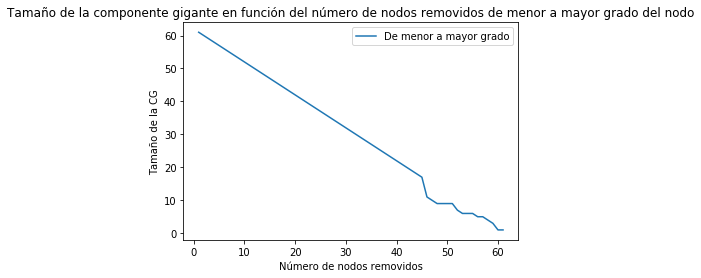

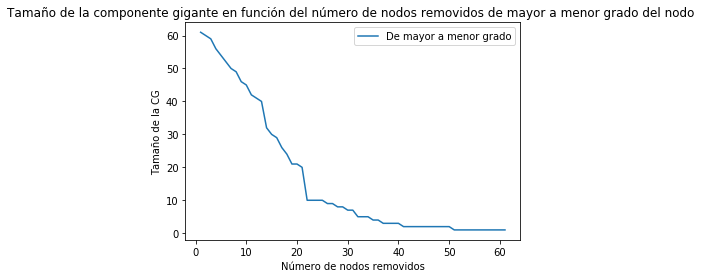

In [195]:
y_Ascendente=Ascendente[0]
x_Ascendente=Ascendente[1]

y_Descendente=Descendente[0]
x_Descendente=Descendente[1]
    
    
plt.plot(x_Ascendente,y_Ascendente,label="De menor a mayor grado")
plt.ylabel("Tamaño de la CG")
plt.xlabel("Número de nodos removidos")
plt.legend()
plt.title("Tamaño de la componente gigante en función del número de nodos removidos de menor a mayor grado del nodo")
plt.show()

plt.plot(x_Descendente,y_Descendente, label="De mayor a menor grado")
plt.ylabel("Tamaño de la CG")
plt.xlabel("Número de nodos removidos")
plt.legend()
plt.title("Tamaño de la componente gigante en función del número de nodos removidos de mayor a menor grado del nodo ")

plt.show()

Se observa una caída más abrupta del tamaño de la componente gigante al remover los nodos de mayor grado primero. Esto puede deberse a que ciertos nodos de alta conectividad pueden ensamblar dos subcomponentes del grado, al remover este nodo y todos sus enlaces puede ayudar a la ruptura de la red y a una disminución de la componente gigante.